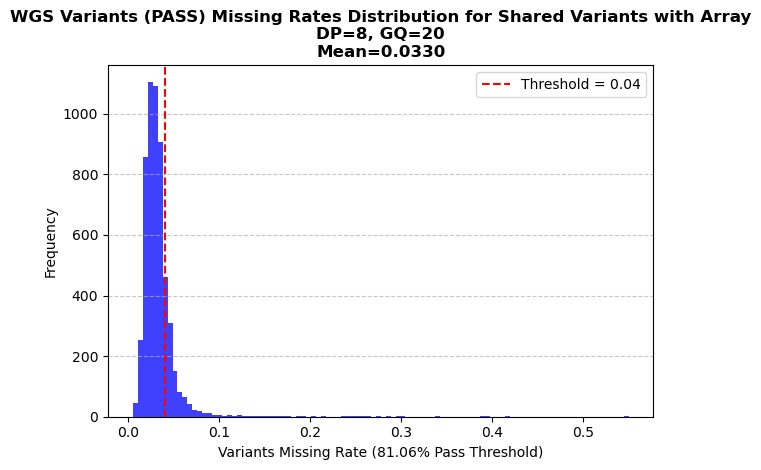

In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import pickle
import os

DP = 8
GQ = 20
miss_threshold = 0.04

work_dir = "/LARGE0/gr10478/b37974/Pulmonary_Hypertension/cteph_agp3k/tuning.concordance/06.call_vcf_dp_gq_vmiss"
dict_file = os.path.join(work_dir, f"DP{DP}_GQ{GQ}_vmissing_rate.pkl")

with open(dict_file, "rb") as f:
    data_dict = pickle.load(f)
    
# Extract the keys and values from the dictionary
keys = list(data_dict.keys())
values = list(data_dict.values())
import matplotlib.pyplot as plt

# Extract all_missing_rate from values
all_missing_rate = values[0][0]
average_missing_rate = values[0][1]

# Calculate the percentage of records below the miss_threshold
below_threshold_percentage = (all_missing_rate < miss_threshold).mean() * 100

# Plot histogram
plt.hist(all_missing_rate, bins=100, alpha=0.75, color='blue')
plt.axvline(x=miss_threshold, color='red', linestyle='--', linewidth=1.5, label=f'Threshold = {miss_threshold}')
plt.title(f'WGS Variants (PASS) Missing Rates Distribution for Shared Variants with Array\nDP={DP}, GQ={GQ}\nMean={average_missing_rate:.4f}', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel(f'Variants Missing Rate ({below_threshold_percentage:.2f}% Pass Threshold)')
plt.ylabel('Frequency')
plt.style.use('default')
plt.tight_layout()
plt.legend()
plt.show()

In [4]:
dp_range = range(1, 31)     
gq_values = [10, 20, 30] 

work_dir = "/LARGE0/gr10478/b37974/Pulmonary_Hypertension/cteph_agp3k/tuning.concordance/06.call_vcf_dp_gq_vmiss"

result_data = []

for dp in dp_range:
    for gq in gq_values:
        file_path = os.path.join(work_dir, f"DP{dp}_GQ{gq}_vmissing_rate.pkl")
        if os.path.exists(file_path):
            with open(file_path, "rb") as f:
                data = pickle.load(f)
                mean_vmiss = list(data.values())[0][1]  # Extract the mean missing rate
                result_data.append({'DP': dp, 'GQ': gq, 'MEAN_VMISS': mean_vmiss})

# Create a DataFrame to store the results
vmiss_df = pd.DataFrame(result_data)

In [5]:
summary_15x_list = []
summary_30x_list = []
summary_all_list = []

work_dir = "/LARGE0/gr10478/b37974/Pulmonary_Hypertension/cteph_agp3k/tuning.concordance/02.concordance_summary"

for dp in dp_range:
    for gq in gq_values:
        filename = f"DP{dp}_GQ{gq}_dict.pkl"
        filepath = os.path.join(work_dir, filename)
        if not os.path.exists(filepath):
            print(f"Warning: {filename} not found.")
            continue
        
        with open(filepath, 'rb') as f:
            result_dict = pickle.load(f)

        # create keys for 15X, 30X, and ALL
        key1 = frozenset([f'DP{dp}', f'GQ{gq}', '15X'])
        key2 = frozenset([f'DP{dp}', f'GQ{gq}', '30X'])
        key3 = frozenset([f'DP{dp}', f'GQ{gq}', 'ALL'])

        # extract summaries
        try:
            summary_15x_list.append(result_dict[key1][2])
            summary_30x_list.append(result_dict[key2][2])
            summary_all_list.append(result_dict[key3][2])
        except KeyError as e:
            print(f"Missing key in {filename}: {e}")

# Concatenate the lists into DataFrames
summary_15x = pd.concat(summary_15x_list, axis=0)
summary_30x = pd.concat(summary_30x_list, axis=0)
summary_all = pd.concat(summary_all_list, axis=0)

In [6]:
# Merge summary_all and vmiss_df on DP and GQ
summary_all = pd.merge(summary_all, vmiss_df, on=['DP', 'GQ'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


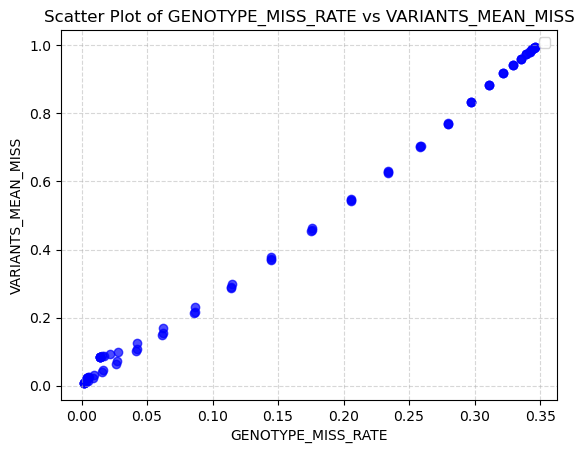

In [7]:
plt.scatter(summary_all['MISS_RATE'], summary_all['MEAN_VMISS'], alpha=0.7, color='blue')
plt.title('Scatter Plot of GENOTYPE_MISS_RATE vs VARIANTS_MEAN_MISS')
plt.xlabel('GENOTYPE_MISS_RATE')
plt.ylabel('VARIANTS_MEAN_MISS')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()